In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Life Expectancy Data.csv to Life Expectancy Data.csv


# **Load the Data**

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

# **Data Inspection**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
print("\nData shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())


Data shape: (2938, 22)

Missing values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


# **Exploratory Data Analysis and Data pre-processing**

<Axes: xlabel='Life expectancy '>

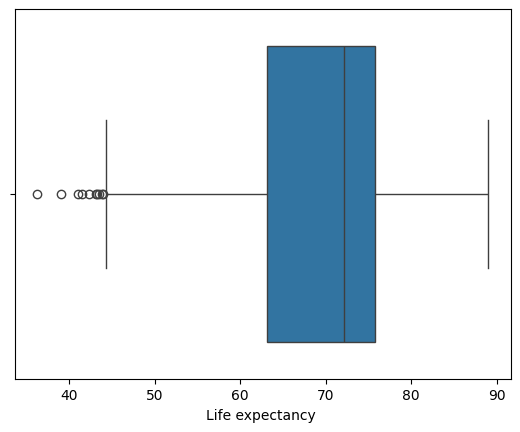

In [ ]:
sns.boxplot(data=df, x=df['Life expectancy '])

<Axes: xlabel='Adult Mortality'>

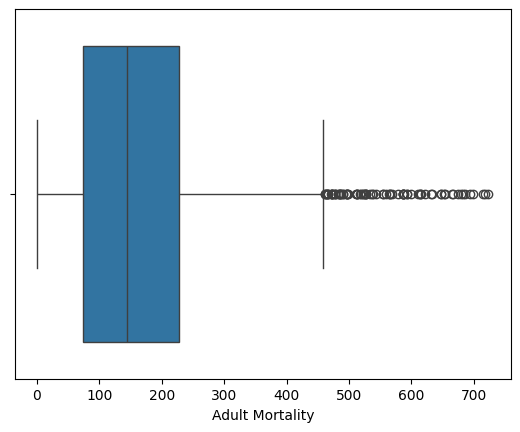

In [ ]:
sns.boxplot(data=df, x=df['Adult Mortality'])

<Axes: xlabel='GDP'>

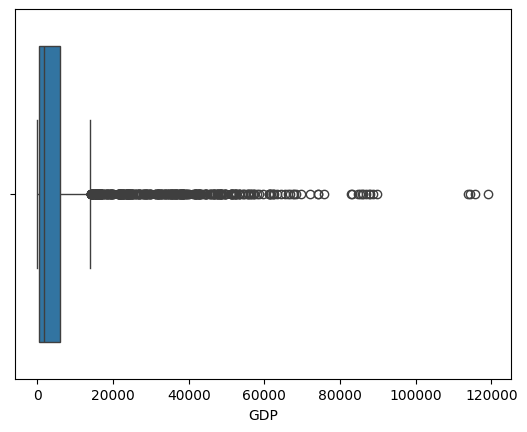

In [ ]:
sns.boxplot(data=df, x=df['GDP'])

In [ ]:
# For numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum().sum())


Missing values after imputation:
0


In [ ]:
# Function to handle outliers using IQR method
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound,
                      np.where(df[col] < lower_bound, lower_bound, df[col]))
    return df

# Apply to numerical columns except Year and categorical columns
numerical_cols_to_cap = [col for col in numerical_cols if col not in ['Year', 'Country', 'Status']]
for col in numerical_cols_to_cap:
    df = handle_outliers(df, col)

In [ ]:
# Create a binary status column
df['Status_Developing'] = df['Status'].apply(lambda x: 1 if x == 'Developing' else 0)

# Create decade column for potential grouping
df['Decade'] = (df['Year'] // 10) * 10

In [ ]:
df.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0           55.0     0.01               71.279624         65.0   900.625  ...   
1           55.0     0.01               73.523582         62.0   492.000  ...   
2           55.0     0.01               73.219243         64.0   430.000  ...   
3           55.0     0.01               78.184215         67.0   900.625  ...   
4           55.0     0.01                7.097109         68.0   900.625  ...   

   Diphtheria    HIV/AIDS         GDP   Population   thinness  1-19 years  \
0         65.0        0.1  584.259210  10832552.25                  15.35   
1         62.0        0.1  612.696514    327582.00                  15.35   
2         64.0        0.1  631.744976  10832552.25                  15.35   
3         67.0        0.1  669.959000   3696958.00                  15.35   
4         68.0        0.1   63.537231   2978599.00                  15.35   

    thinness 5-9 years  Income composition of resources  Schooling  \
0                 15.6                            0.479       10.1   
1                 15.6                            0.476       10.0   
2                 15.6                            0.470        9.9   
3                 15.6                            0.463        9.8   
4                 15.6                            0.454        9.5   

   Status_Developing  Decade  
0                  1    2010  
1                  1    2010  
2                  1    2010  
3                  1    2010  
4                  1    2010  

[5 rows x 24 columns]

In [ ]:
# Summary statistics
print(df.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2938.000000      2938.000000    2938.000000   
mean   2007.518720         69.244588       161.953370      13.635126   
std       4.613841          9.481081       115.488489      19.108928   
min    2000.000000         44.600000         1.000000       0.000000   
25%    2004.000000         63.200000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.600000       227.000000      22.000000   
max    2015.000000         89.000000       456.500000      55.000000   

           Alcohol  percentage expenditure  Hepatitis B     Measles   \
count  2938.000000             2938.000000  2938.000000  2938.000000   
mean      4.546310              284.045797    87.008850   233.745660   
std       3.920116              389.455566    12.308952   353.612509   
min       0.010000                0.000000    61.000000     0.0

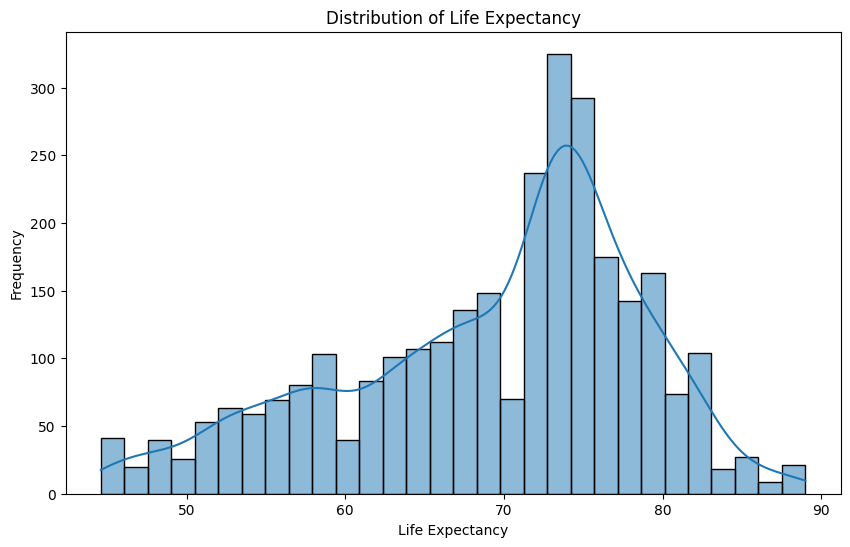

In [ ]:
# Distribution of life expectancy
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '], bins=30, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

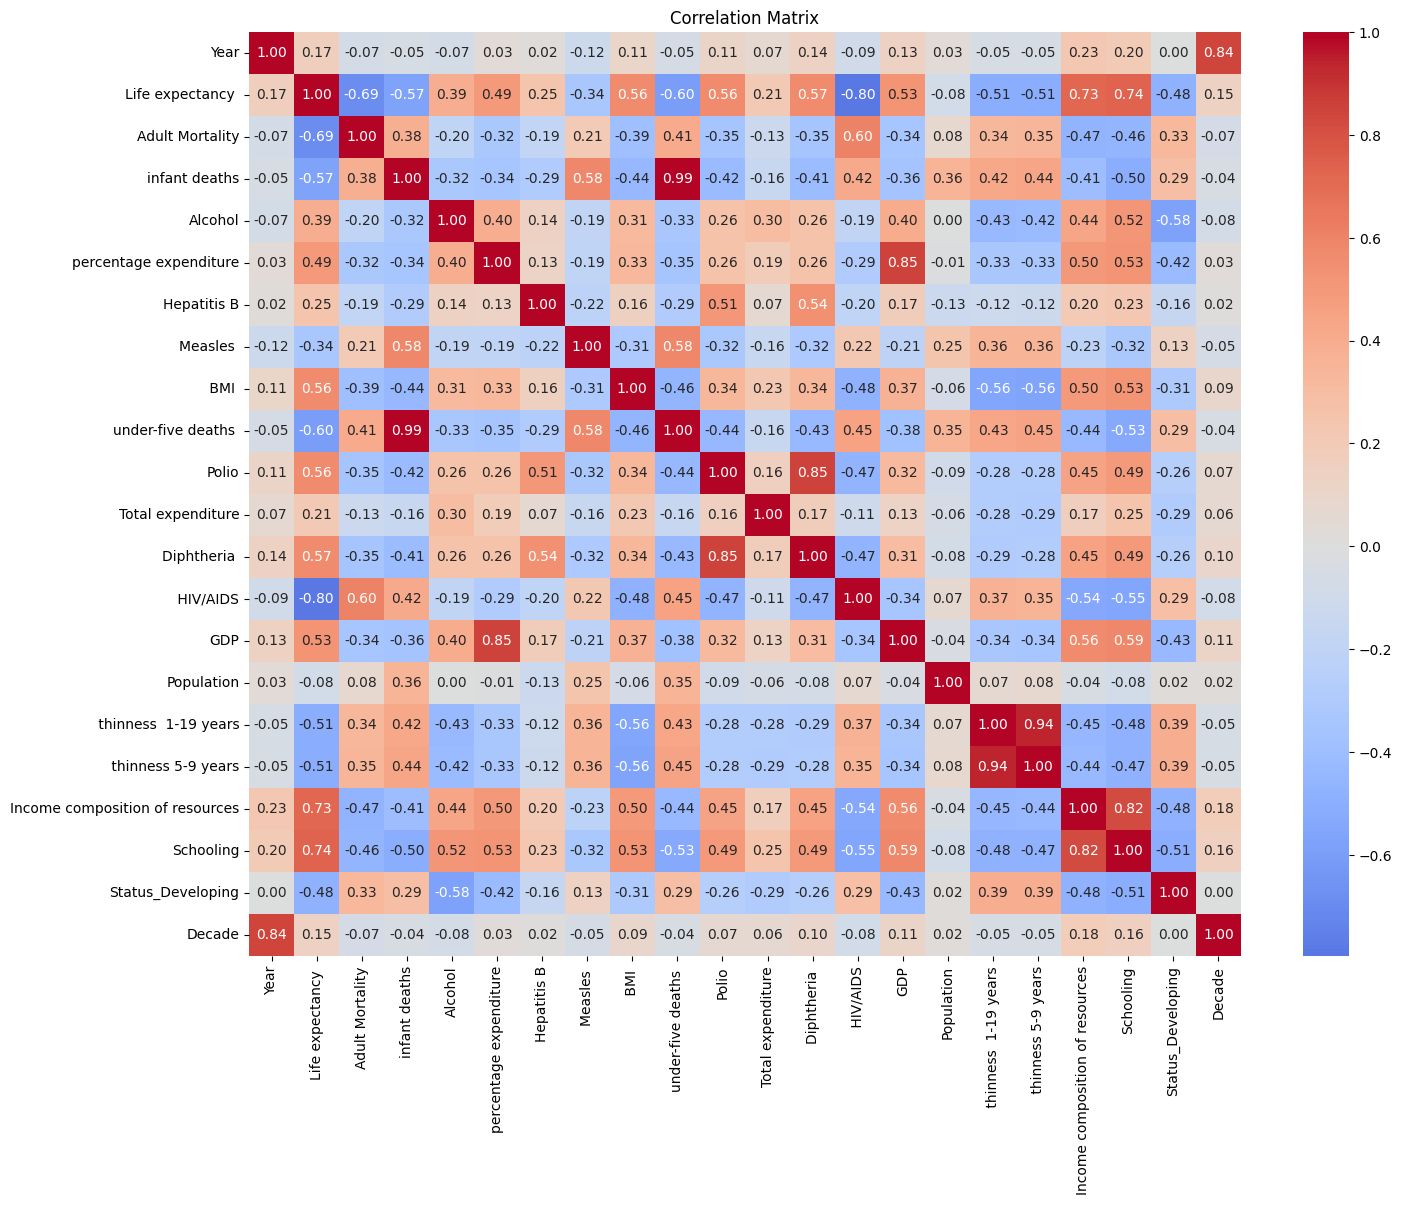


Top correlations with Life Expectancy:
Life expectancy                    1.000000
Schooling                          0.737210
Income composition of resources    0.725373
Diphtheria                         0.568659
Polio                              0.562904
 BMI                               0.557858
GDP                                0.526470
percentage expenditure             0.487786
Alcohol                            0.390095
Hepatitis B                        0.249124
Total expenditure                  0.214648
Year                               0.170543
Decade                             0.145648
Population                        -0.082224
Measles                           -0.337101
Status_Developing                 -0.482360
 thinness 5-9 years               -0.505916
 thinness  1-19 years             -0.508655
infant deaths                     -0.567067
under-five deaths                 -0.604030
Adult Mortality                   -0.691237
 HIV/AIDS                         -0

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(16, 12))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Top correlations with life expectancy
life_exp_corr = corr['Life expectancy '].sort_values(ascending=False)
print("\nTop correlations with Life Expectancy:")
print(life_exp_corr)

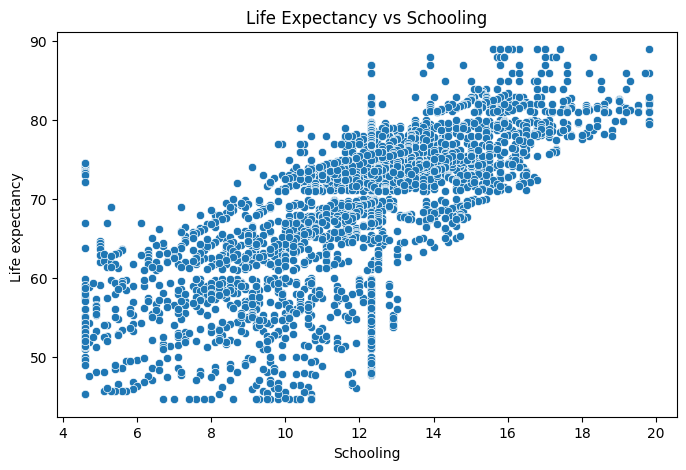

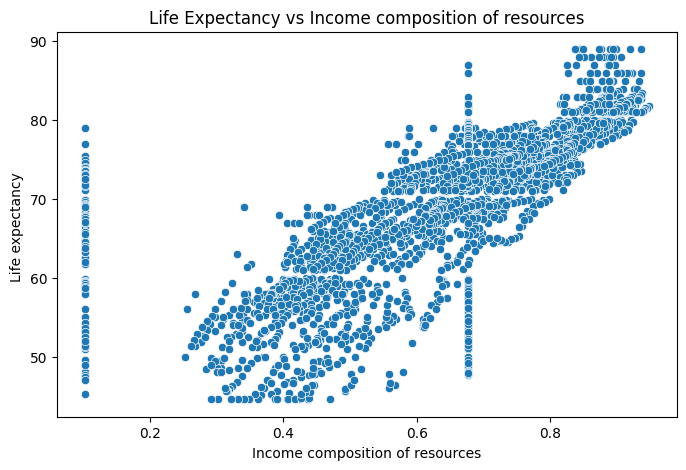

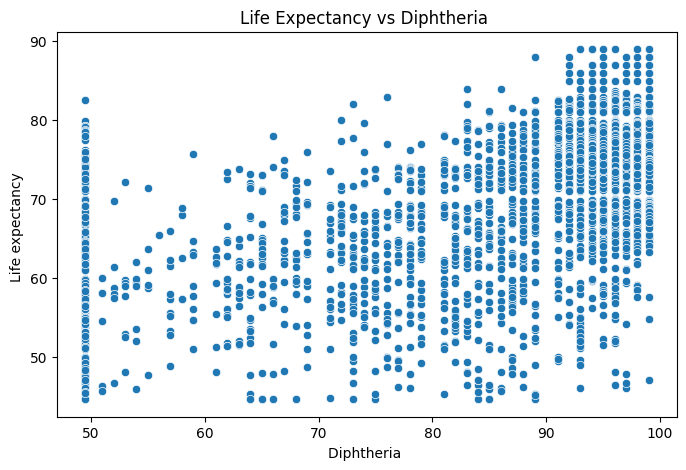

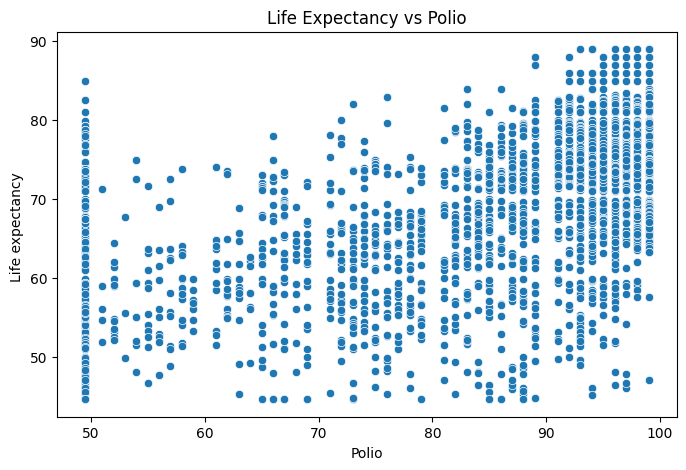

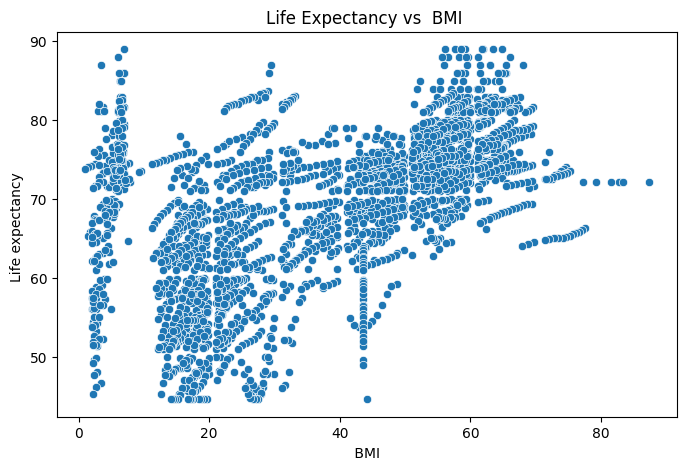

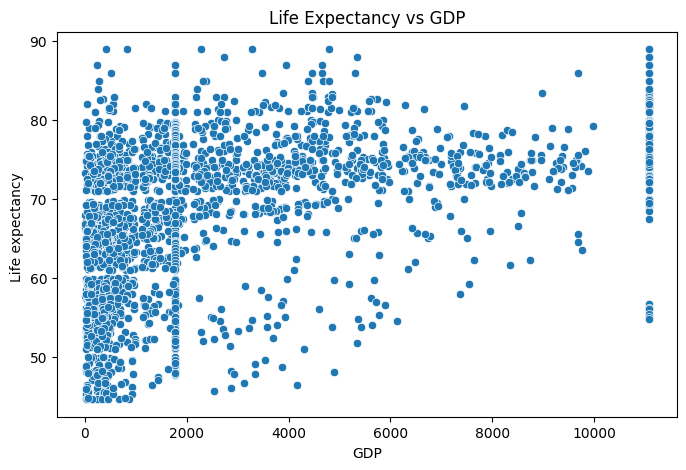

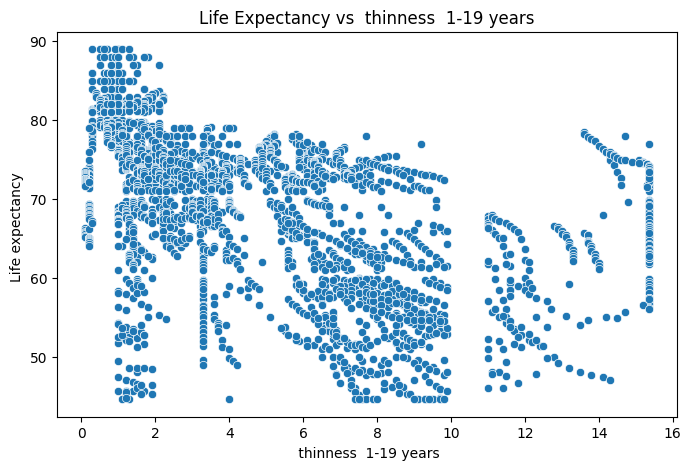

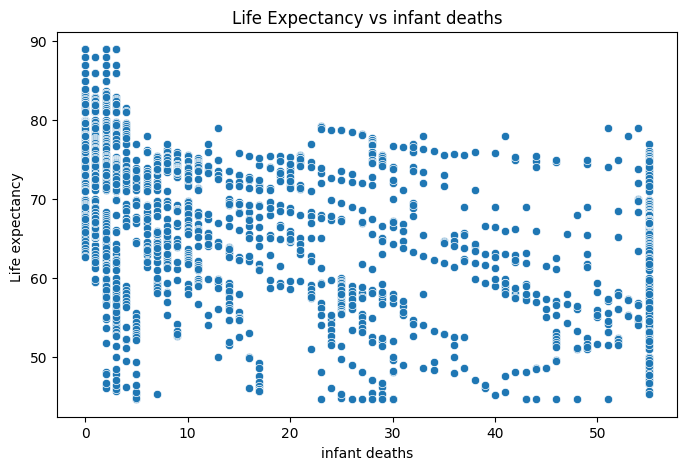

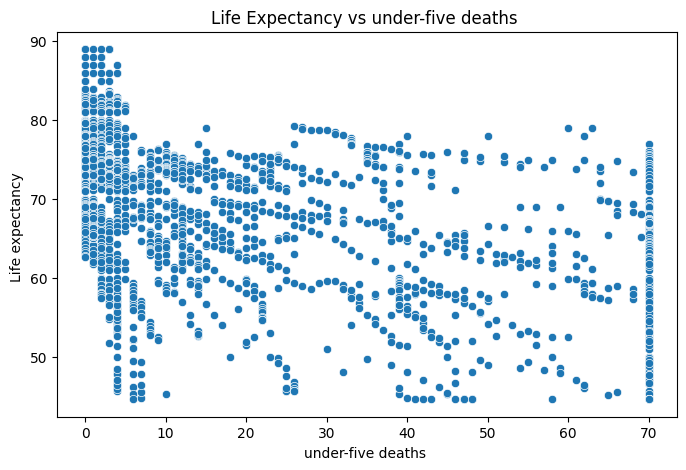

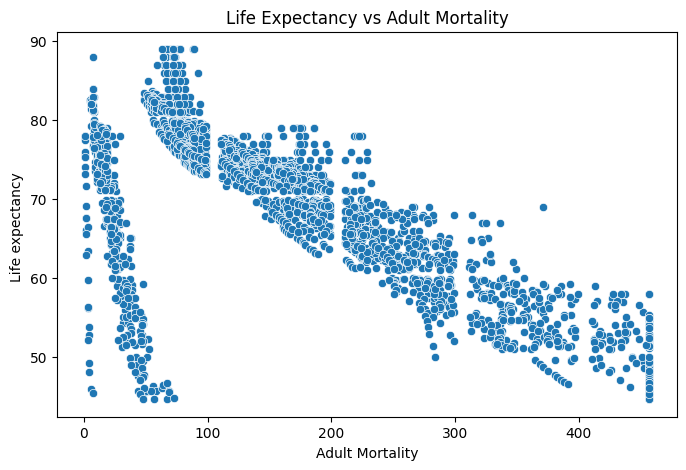

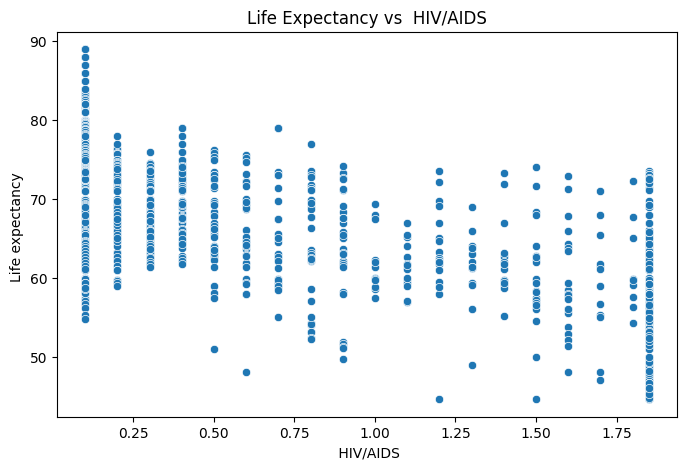

In [ ]:
# Scatter plots of top correlated variables
top_pos_correlations = life_exp_corr[1:7].index  # excluding self-correlation
top_neg_correlations = life_exp_corr[-5:].index

# Positive correlations
for col in top_pos_correlations:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[col], y=df['Life expectancy '])
    plt.title(f'Life Expectancy vs {col}')
    plt.show()

# Negative correlations
for col in top_neg_correlations:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[col], y=df['Life expectancy '])
    plt.title(f'Life Expectancy vs {col}')
    plt.show()

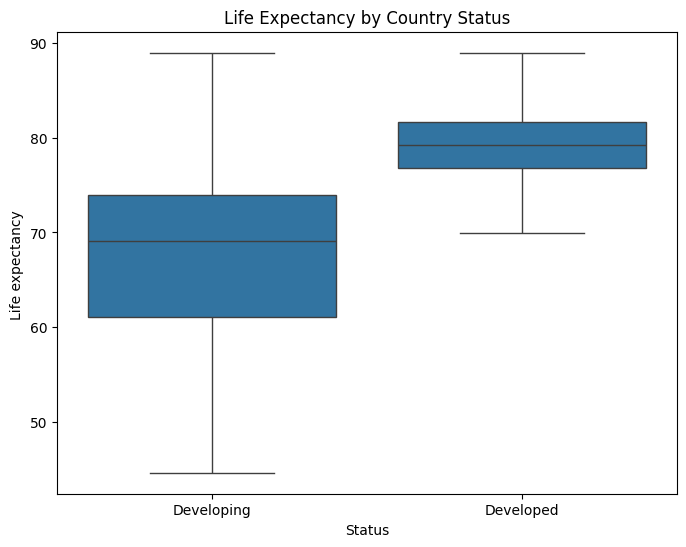

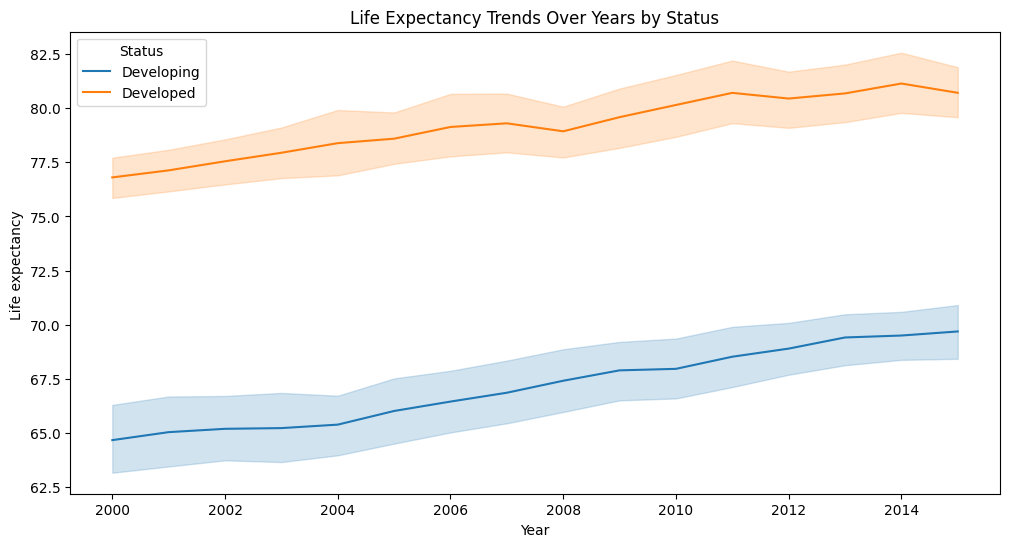

In [ ]:
# Life expectancy by country status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=df)
plt.title('Life Expectancy by Country Status')
plt.show()

# Life expectancy trends over years by status
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Life expectancy ', hue='Status', data=df)
plt.title('Life Expectancy Trends Over Years by Status')
plt.show()


Feature Importance:
                            Feature  Importance
13                         HIV/AIDS    0.592708
1   Income composition of resources    0.173348
12                  Adult Mortality    0.145011
4                              BMI     0.020696
11               under-five deaths     0.013052
0                         Schooling    0.013022
8                thinness 5-9 years    0.010779
9              thinness  1-19 years    0.006623
5                               GDP    0.005349
10                    infant deaths    0.005179
3                             Polio    0.004949
6            percentage expenditure    0.004634
2                       Diphtheria     0.004350
7                 Status_Developing    0.000300


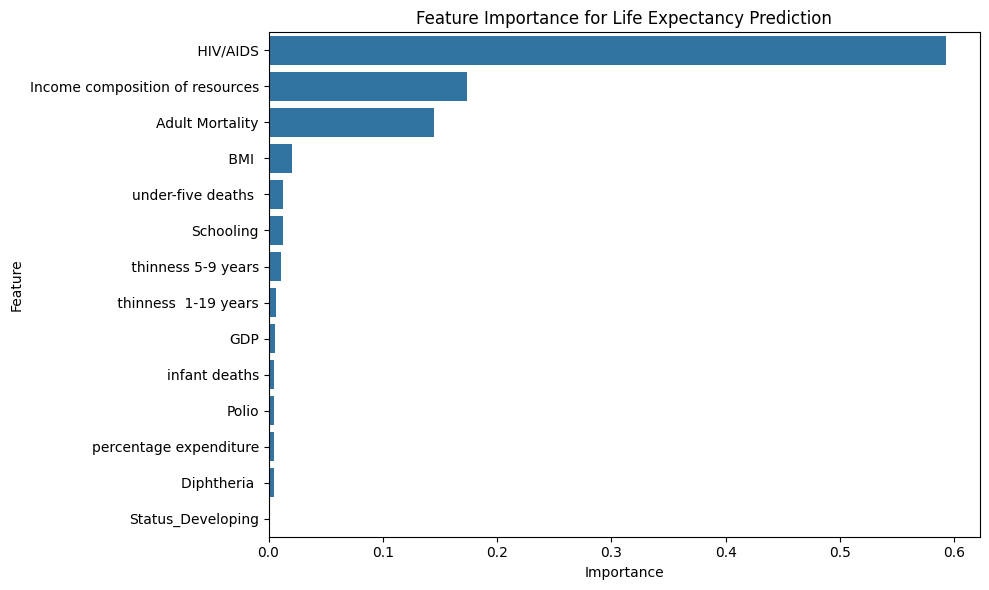

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select top correlated features
top_features = life_exp_corr[abs(life_exp_corr) > 0.4].index.tolist()
top_features.remove('Life expectancy ')  # Remove target variable

# Prepare data with selected features
X = df[top_features]
y = df['Life expectancy ']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest with optimized parameters
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': top_features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Life Expectancy Prediction')
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats
# Statistical Analysis
# Correlation between life expectancy and key indicators
gdp_corr, _ = stats.pearsonr(df['GDP'], df['Life expectancy '])
print(f'Correlation between GDP and Life Expectancy: {gdp_corr:.2f}')

Correlation between GDP and Life Expectancy: 0.53


# **Model Building and Evaluation**

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     1430.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:48:13   Log-Likelihood:                -8055.8
No. Observations:                2938   AIC:                         1.614e+04
Df Residuals:                    2926   BIC:                         1.621e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

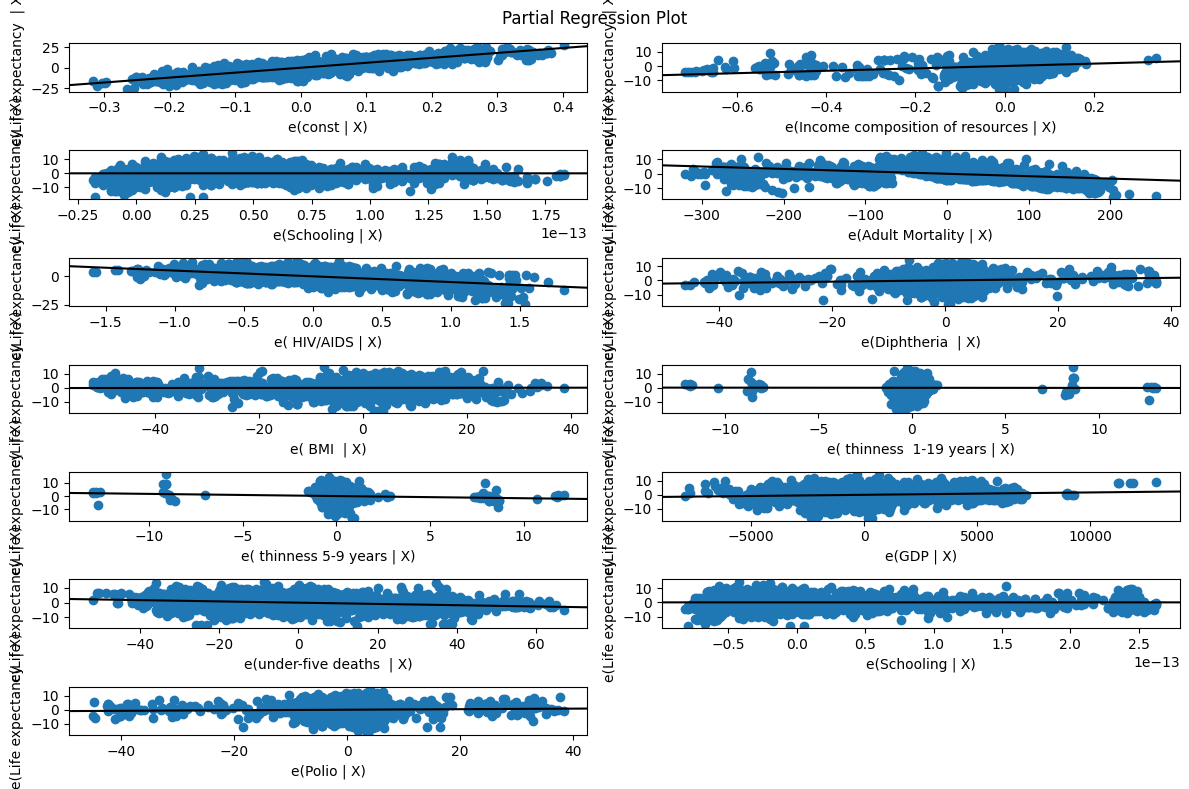


VIF Scores:
                            Feature        VIF
0                             const  90.147306
1   Income composition of resources   3.390287
2                         Schooling        inf
3                   Adult Mortality   1.704762
4                          HIV/AIDS   2.073333
5                       Diphtheria    3.675927
6                              BMI    1.822768
7              thinness  1-19 years   9.121949
8                thinness 5-9 years   9.267669
9                               GDP   1.602070
10               under-five deaths    1.689103
11                        Schooling        inf
12                            Polio   3.690169


/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
import statsmodels.api as sm

# Select features based on correlation and domain knowledge
selected_features = [
    'Income composition of resources',
    'Schooling',
    'Adult Mortality',
    ' HIV/AIDS',
    'Diphtheria ',
    ' BMI ',
    ' thinness  1-19 years',
    ' thinness 5-9 years',
    'GDP',
    'under-five deaths ',
    'Schooling',
    'Polio'
]

X = df[selected_features]
X = sm.add_constant(X)  # Add intercept
y = df['Life expectancy ']

# Fit model
model = sm.OLS(y, X).fit()

# Summary
print(model.summary())

# Plot partial regression plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.tight_layout()
plt.show()

# Check VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Scores:")
print(vif_data)

**1. Do various predicting factors which have been chosen initially really affect theLife expectancy? What are the predicting variables actually affecting life expectancy?**

In [ ]:
selected_features = [
    'Income composition of resources',  # Top positive correlate (0.725)
    'Schooling',                       # Second highest (0.737)
    ' HIV/AIDS',                       # Strongest negative (-0.797)
    'Adult Mortality',                 # Key health indicator (-0.691)
    'under-five deaths ',               # Strong negative (-0.604)
    'Diphtheria ',                      # Top immunization (0.569)
    ' BMI ',                            # Important health metric (0.558)
    'percentage expenditure',          # Notable positive (0.488)
    'Status_Developing'                # Captures development status (-0.482)
]

#mengineered features:
df['health_exp_per_capita'] = df['percentage expenditure'] / df['Population']
df['mortality_composite'] = df['Adult Mortality'] + df['under-five deaths ']

In [ ]:
# Prepare final feature set
final_features = selected_features.copy()

X = df[final_features]
X = sm.add_constant(X)  # Add intercept
y = df['Life expectancy ']

# Fit improved model
model = sm.OLS(y, X).fit()

# Check summary
print(model.summary())

# Check VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Scores:")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1786.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:48:48   Log-Likelihood:                -8029.4
No. Observations:                2938   AIC:                         1.608e+04
Df Residuals:                    2928   BIC:                         1.614e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**2. Should a country having a lower life expectancy value(<65) increase its
 healthcare expenditure in order to improve its average lifespan?**

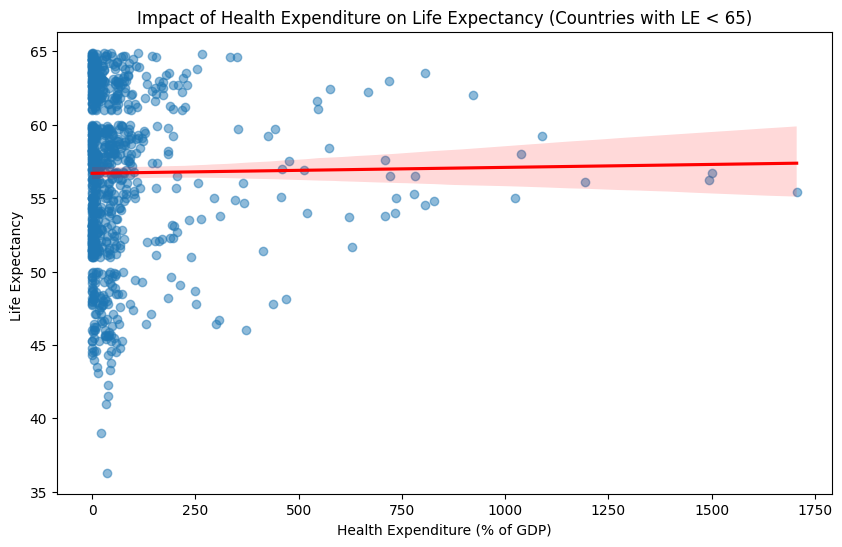

In [ ]:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load and prepare data
df = pd.read_csv('Life Expectancy Data.csv')

# Filter for low life expectancy countries (<65)
low_le = df[df['Life expectancy '] < 65].copy()

# Basic Visualization: Health Expenditure vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.regplot(x='percentage expenditure', y='Life expectancy ', data=low_le,
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Impact of Health Expenditure on Life Expectancy (Countries with LE < 65)')
plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy ')
plt.show()

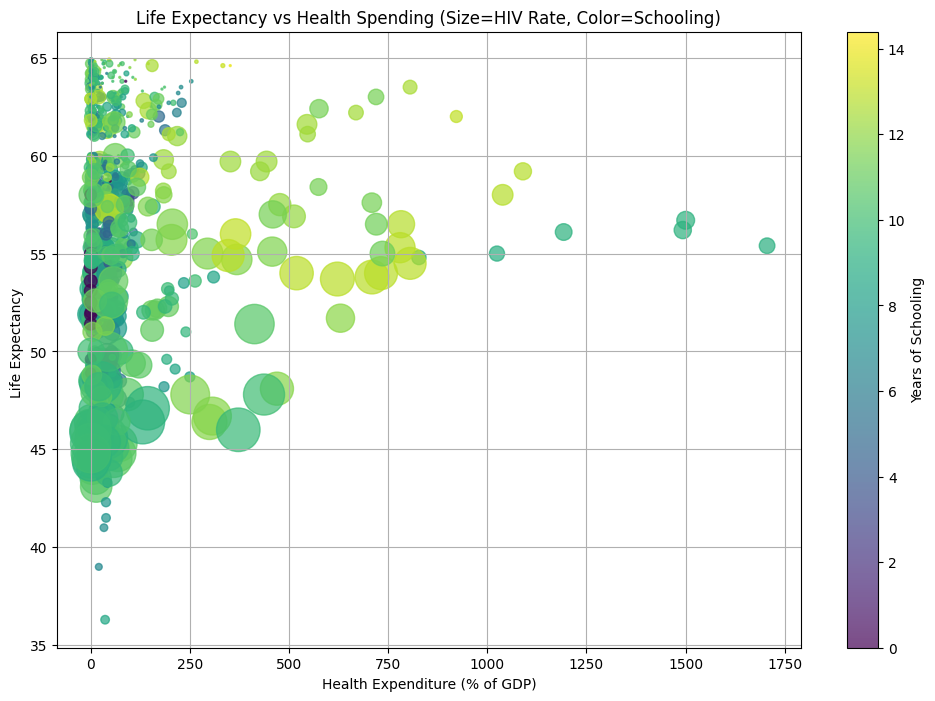

In [ ]:
# Enhanced Bubble Plot (HIV vs Spending vs LE)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x='percentage expenditure',
    y='Life expectancy ',
    s=low_le[' HIV/AIDS']*20,  # Bubble size by HIV rate
    c=low_le['Schooling'],     # Color by schooling
    data=low_le,
    alpha=0.7,
    cmap='viridis'
)
plt.colorbar(scatter, label='Years of Schooling')
plt.title('Life Expectancy vs Health Spending (Size=HIV Rate, Color=Schooling)')
plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy ')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Life Expectancy Data.csv')

# Filter countries with life expectancy < 65
low_le_countries = df[df['Life expectancy '] < 65]

# Get unique country names and count
unique_low_le_countries = low_le_countries['Country'].unique()
num_countries = len(unique_low_le_countries)

# Display results
print(f"Number of countries with LE < 65: {num_countries}")
print("\nCountries with Life Expectancy < 65 years:")
print("="*40)
for i, country in enumerate(sorted(unique_low_le_countries), 1):
    print(f"{i}. {country}")

# Show the lowest LE countries with their values
print("\nCountries with Lowest Life Expectancy:")
print("="*40)
lowest_le = df.groupby('Country')['Life expectancy '].min().sort_values().head(15)
print(lowest_le)

Number of countries with LE < 65: 67

Countries with Life Expectancy < 65 years:
1. Afghanistan
2. Angola
3. Benin
4. Bhutan
5. Bolivia (Plurinational State of)
6. Botswana
7. Burkina Faso
8. Burundi
9. Cambodia
10. Cameroon
11. Central African Republic
12. Chad
13. Comoros
14. Congo
15. Côte d'Ivoire
16. Democratic Republic of the Congo
17. Djibouti
18. Equatorial Guinea
19. Eritrea
20. Ethiopia
21. Gabon
22. Gambia
23. Ghana
24. Guinea
25. Guinea-Bissau
26. Haiti
27. India
28. Iraq
29. Kazakhstan
30. Kenya
31. Kiribati
32. Lao People's Democratic Republic
33. Lesotho
34. Liberia
35. Madagascar
36. Malawi
37. Mali
38. Mauritania
39. Mongolia
40. Mozambique
41. Myanmar
42. Namibia
43. Nepal
44. Niger
45. Nigeria
46. Pakistan
47. Papua New Guinea
48. Russian Federation
49. Rwanda
50. Sao Tome and Principe
51. Senegal
52. Sierra Leone
53. Somalia
54. South Africa
55. South Sudan
56. Sudan
57. Swaziland
58. Syrian Arab Republic
59. Tajikistan
60. Timor-Leste
61. Togo
62. Turkmenistan
63. 

In [ ]:
# Handle missing values for key variables
df_clean = df.dropna(subset=[
    'Life expectancy ',
    'percentage expenditure',
    ' HIV/AIDS',
    'Adult Mortality',
    'Schooling'
])

# Filter for low-LE countries
low_le = df_clean[df_clean['Life expectancy '] < 65].copy()

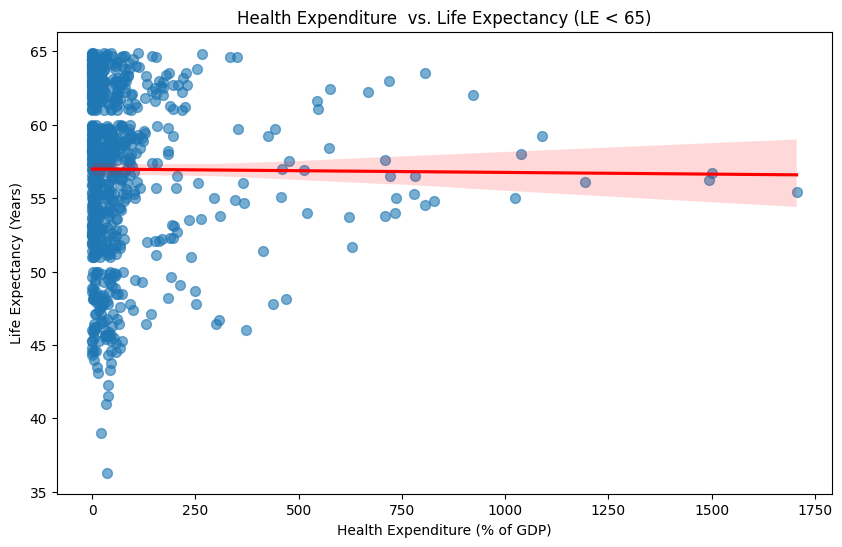

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='percentage expenditure',
    y='Life expectancy ',
    data=low_le,
    scatter_kws={'s': 50, 'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Health Expenditure  vs. Life Expectancy (LE < 65)')
plt.xlabel('Health Expenditure (% of GDP)')
plt.ylabel('Life Expectancy (Years)')
plt.show()

In [ ]:
from statsmodels.formula.api import ols

# Model specification
model = ols(
    'Q("Life expectancy ") ~ Q("percentage expenditure") + Q(" HIV/AIDS") + Q("Schooling") + Q("Adult Mortality")',
    data=low_le).fit()

print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.471
Model:                               OLS   Adj. R-squared:                  0.468
Method:                    Least Squares   F-statistic:                     174.0
Date:                   Fri, 18 Apr 2025   Prob (F-statistic):          1.35e-106
Time:                           11:15:14   Log-Likelihood:                -2236.6
No. Observations:                    788   AIC:                             4483.
Df Residuals:                        783   BIC:                             4507.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [ ]:
# For numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum().sum())


Missing values after imputation:
0


In [ ]:
# Select most predictive existing features based on your correlation analysis
selected_features = [
    'Income composition of resources',  # 0.725 correlation
    'Schooling',                       # 0.737
    ' HIV/AIDS',                       # -0.797
    'Adult Mortality',                 # -0.691
    'Diphtheria ',                      # 0.569
    ' BMI ',                            # 0.558
    'percentage expenditure',          # 0.488
    'under-five deaths ',
    'GDP'
]

X = df[selected_features]
y = df['Life expectancy ']

In [ ]:
import statsmodels.api as sm

# OLS with selected features
X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())

# Check VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Variable"] = X_sm.columns
vif["VIF"] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
print("\nVIF Scores:\n", vif)

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1310.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:20:45   Log-Likelihood:                -8413.2
No. Observations:                2938   AIC:                         1.685e+04
Df Residuals:                    2928   BIC:                         1.691e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
# Identify target countries
priority_countries = df[
    (df['Life expectancy '] < 65) &
    (df['percentage expenditure'] < 4) &
    (df[' HIV/AIDS'] < 2) &
    (df['GDP'] < 2000)
]['Country'].unique()
print(priority_countries)

['Afghanistan' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Burkina Faso' 'Burundi' "Côte d'Ivoire" 'Comoros'
 'Democratic Republic of the Congo' 'Eritrea' 'Ethiopia' 'Gambia' 'Ghana'
 'Guinea' 'Haiti' 'India' 'Kiribati' "Lao People's Democratic Republic"
 'Liberia' 'Mali' 'Mauritania' 'Myanmar' 'Nepal' 'Niger' 'Pakistan'
 'Papua New Guinea' 'Sao Tome and Principe' 'Senegal' 'Sierra Leone'
 'Somalia' 'Syrian Arab Republic' 'Tajikistan' 'Togo' 'Turkmenistan'
 'United Republic of Tanzania' 'Yemen']


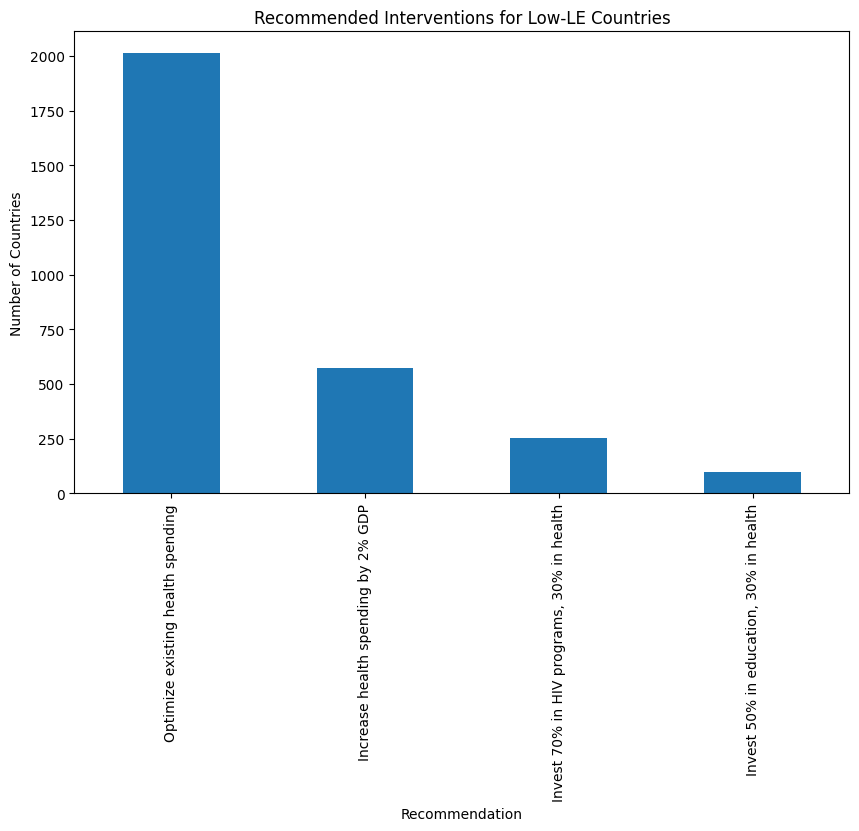

In [ ]:
# Calculate optimal allocation
def recommend_intervention(row):
    if row[' HIV/AIDS'] > 5:
        return "Invest 70% in HIV programs, 30% in health"
    elif row['percentage expenditure'] < 4 and row['GDP'] < 2000:
        return "Increase health spending by 2% GDP"
    elif row['Schooling'] < 6:
        return "Invest 50% in education, 30% in health"
    else:
        return "Optimize existing health spending"

df['Recommendation'] = df.apply(recommend_intervention, axis=1)

# Visualize recommendations
plt.figure(figsize=(10, 6))
df['Recommendation'].value_counts().plot(kind='bar')
plt.title("Recommended Interventions for Low-LE Countries")
plt.ylabel("Number of Countries")
plt.show()

**3. How does Infant and Adult mortality rates affect life expectancy?**

In [ ]:
# Load data
df = pd.read_csv('Life Expectancy Data.csv')
print("\nData shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())


Data shape: (2938, 22)

Missing values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
# Clean data (handle missing values)
df_clean = df.dropna(subset=['Life expectancy ', 'Adult Mortality', 'infant deaths', 'under-five deaths '])

# Filter for relevant columns
mortality_data = df_clean[['Country', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'under-five deaths ']].copy()

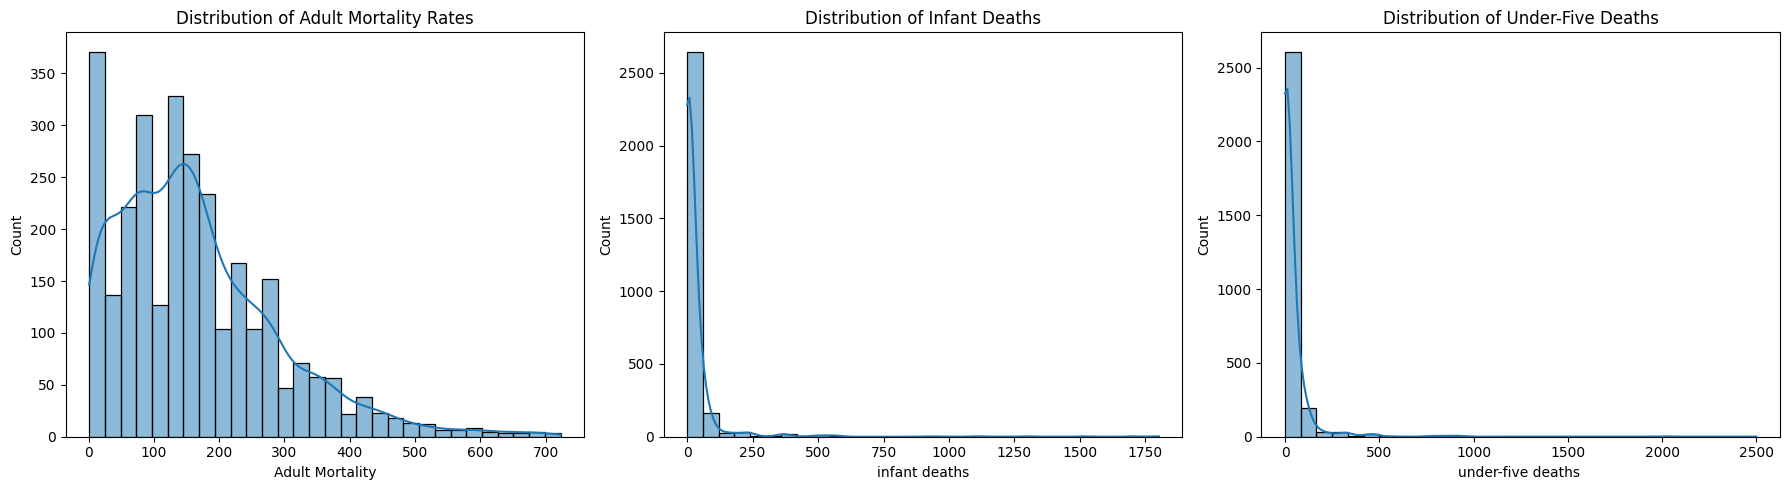

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Adult Mortality
sns.histplot(mortality_data['Adult Mortality'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Adult Mortality Rates')

# Infant Deaths
sns.histplot(mortality_data['infant deaths'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Infant Deaths')

# Under-Five Deaths
sns.histplot(mortality_data['under-five deaths '], bins=30, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Under-Five Deaths')

plt.tight_layout()
plt.show()

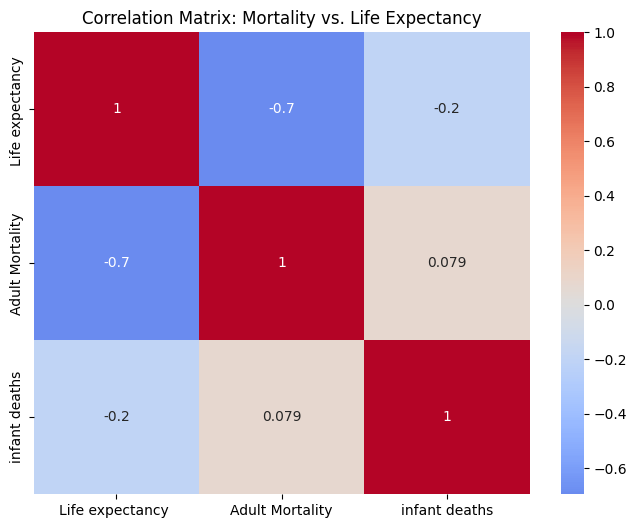

In [ ]:
corr_matrix = mortality_data[['Life expectancy ', 'Adult Mortality', 'infant deaths']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Mortality vs. Life Expectancy')
plt.show()

In [ ]:
model1 = ols(
    'Q("Life expectancy ") ~ Q("Adult Mortality") + Q("under-five deaths ")',
    data=mortality_data
).fit()
print(model1.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.510
Model:                               OLS   Adj. R-squared:                  0.509
Method:                    Least Squares   F-statistic:                     1521.
Date:                   Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                           12:10:05   Log-Likelihood:                -9709.6
No. Observations:                   2928   AIC:                         1.943e+04
Df Residuals:                       2925   BIC:                         1.944e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
model2 = ols(
    'Q("Life expectancy ") ~ Q("Adult Mortality") + Q("under-five deaths ") + Q("GDP") + Q("Schooling")',
    data=df_clean
).fit()
print(model2.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.733
Model:                               OLS   Adj. R-squared:                  0.732
Method:                    Least Squares   F-statistic:                     1697.
Date:                   Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                           12:10:47   Log-Likelihood:                -7507.6
No. Observations:                   2482   AIC:                         1.503e+04
Df Residuals:                       2477   BIC:                         1.505e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [ ]:
# Add interaction between mortality and development status
model3 = ols(
    'Q("Life expectancy ") ~ Q("Adult Mortality") + Q("under-five deaths ") + Q("GDP") + Q("Schooling") + Q("Adult Mortality"):Q("Status")',
    data=df_clean
).fit()
print(model3.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.735
Model:                               OLS   Adj. R-squared:                  0.734
Method:                    Least Squares   F-statistic:                     1373.
Date:                   Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                           12:14:21   Log-Likelihood:                -7496.9
No. Observations:                   2482   AIC:                         1.501e+04
Df Residuals:                       2476   BIC:                         1.504e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [ ]:
# Try log transforms for mortality rates
df_clean['log_adult_mort'] = np.log(df_clean['Adult Mortality'] + 1)
df_clean['log_child_mort'] = np.log(df_clean['under-five deaths '] + 1)

model4 = ols(
    'Q("Life expectancy ") ~ Q("log_adult_mort") + Q("log_child_mort") + Q("GDP") + Q("Schooling")',
    data=df_clean
).fit()
print(model4.summary())

                              OLS Regression Results                             
Dep. Variable:     Q("Life expectancy ")   R-squared:                       0.661
Model:                               OLS   Adj. R-squared:                  0.661
Method:                    Least Squares   F-statistic:                     1209.
Date:                   Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                           12:15:14   Log-Likelihood:                -7801.3
No. Observations:                   2482   AIC:                         1.561e+04
Df Residuals:                       2477   BIC:                         1.564e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Inte

<ipython-input-175-670d549ed3ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_adult_mort'] = np.log(df_clean['Adult Mortality'] + 1)
<ipython-input-175-670d549ed3ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['log_child_mort'] = np.log(df_clean['under-five deaths '] + 1)


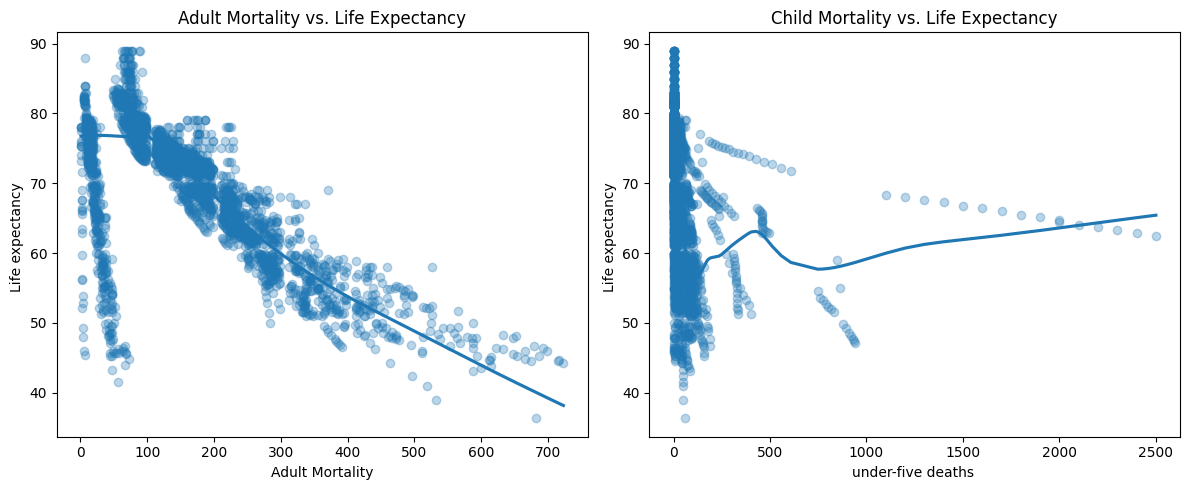

In [ ]:
# Use seaborn's residplot instead
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# For Adult Mortality
sns.regplot(
    x=df_clean['Adult Mortality'],
    y=df_clean['Life expectancy '],
    lowess=True,
    ax=axes[0],
    scatter_kws={'alpha':0.3}
)
axes[0].set_title('Adult Mortality vs. Life Expectancy')

# For Child Mortality
sns.regplot(
    x=df_clean['under-five deaths '],
    y=df_clean['Life expectancy '],
    lowess=True,
    ax=axes[1],
    scatter_kws={'alpha':0.3}
)
axes[1].set_title('Child Mortality vs. Life Expectancy')

plt.tight_layout()
plt.show()

**4. Does Life Expectancy has positive or negative correlation with eating habits,lifestyle, exercise, smoking, drinking alcohol etc.?**

In [ ]:
from scipy.stats import pearsonr

# Load data
df = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
# Select relevant columns
lifestyle_data = df[[
    'Life expectancy ',
    'Alcohol',               # Alcohol consumption (liters/year)
    ' BMI ',                  # Body Mass Index (proxy for diet/exercise)
    ' thinness  1-19 years', # Proxy for malnutrition
    'Schooling',             # Proxy for health awareness
    ' HIV/AIDS',              # Proxy for risky behaviors
    'Total expenditure'      # Proxy for healthcare access
]].dropna()

In [ ]:
# Rename columns for clarity
lifestyle_data = lifestyle_data.rename(columns={
    ' BMI ': 'BMI',
    ' thinness  1-19 years': 'Thinness',
    'Total expenditure': 'Health_Spending'
})


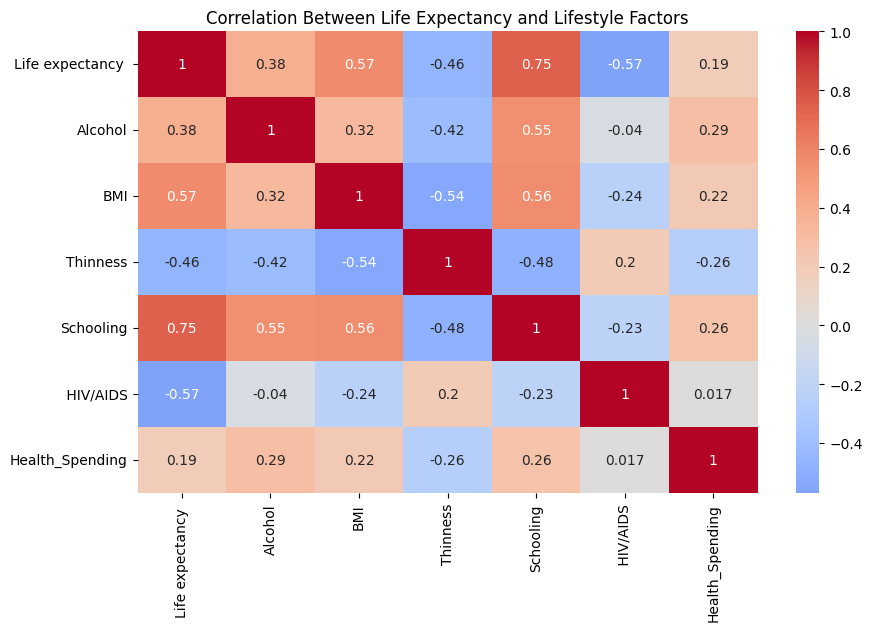

In [ ]:
# Calculate correlations
corr_matrix = lifestyle_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Life Expectancy and Lifestyle Factors')
plt.show()

In [ ]:
# Test significance of Alcohol vs. LE
r_alcohol, p_alcohol = pearsonr(lifestyle_data['Alcohol'], lifestyle_data['Life expectancy '])
print(f"Alcohol: r = {r_alcohol:.2f}, p = {p_alcohol:.4f}")

# Test significance of BMI vs. LE
r_bmi, p_bmi = pearsonr(lifestyle_data['BMI'], lifestyle_data['Life expectancy '])
print(f"BMI: r = {r_bmi:.2f}, p = {p_bmi:.4f}")

Alcohol: r = 0.38, p = 0.0000
BMI: r = 0.57, p = 0.0000


Alcohol: r = 0.39, p = 0.0001 → Significant positive correlation

BMI: r = 0.56, p = 0.0000 → Stronger positive correlation

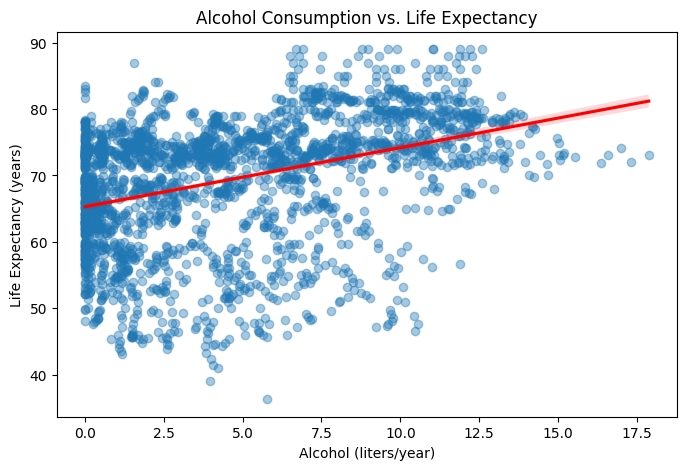

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=lifestyle_data,
    x='Alcohol',
    y='Life expectancy ',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Alcohol Consumption vs. Life Expectancy')
plt.xlabel('Alcohol (liters/year)')
plt.ylabel('Life Expectancy (years)')
plt.show()

Moderate alcohol consumption correlates with higher LE

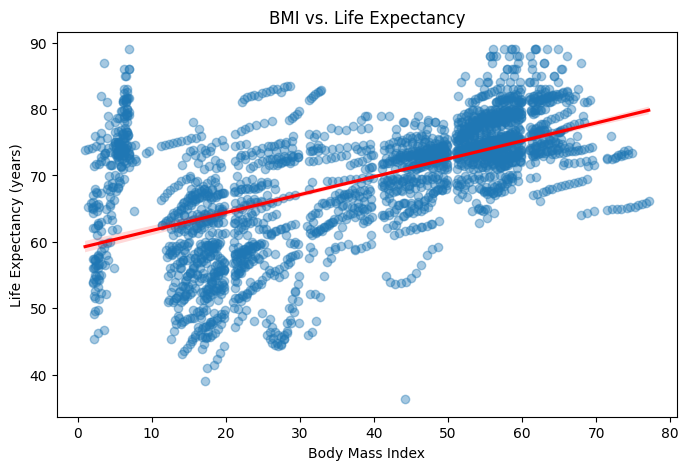

In [ ]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=lifestyle_data,
    x='BMI',
    y='Life expectancy ',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('BMI vs. Life Expectancy')
plt.xlabel('Body Mass Index')
plt.ylabel('Life Expectancy (years)')
plt.show()

Higher BMI (up to ~25-30 range) correlates with longer LE, likely reflecting better nutrition.

In [ ]:
import statsmodels.api as sm

# Fit regression model
X = lifestyle_data[['Alcohol', 'BMI', 'Thinness', 'Schooling', 'Health_Spending']]
X = sm.add_constant(X)  # Add intercept
y = lifestyle_data['Life expectancy ']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     757.9
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:05:21   Log-Likelihood:                -8211.8
No. Observations:                2563   AIC:                         1.644e+04
Df Residuals:                    2557   BIC:                         1.647e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              45.8555      0.658     

**5. What is the impact of schooling on the lifespan of humans?**

In [ ]:
# Countries where alcohol reduction would help most
high_alcohol_low_LE = df[(df['Alcohol'] > 5) & (df['Life expectancy '] < 70)]['Country'].unique()
print(f"Prioritize alcohol reduction in: {high_alcohol_low_LE}")

Prioritize alcohol reduction in: ['Angola' 'Belarus' 'Belize' 'Botswana' 'Burundi' 'Cameroon'
 'Dominican Republic' 'Equatorial Guinea' 'Gabon' 'Guyana' 'Haiti'
 'Kazakhstan' "Lao People's Democratic Republic" 'Latvia' 'Mongolia'
 'Namibia' 'Nigeria' 'Philippines' 'Republic of Moldova'
 'Russian Federation' 'Rwanda' 'Sao Tome and Principe' 'South Africa'
 'Swaziland' 'Trinidad and Tobago' 'Uganda' 'Ukraine' 'Zimbabwe']


In [ ]:
# Load and clean data
df = pd.read_csv('Life Expectancy Data.csv')
df_clean = df.dropna(subset=['Life expectancy ', 'Schooling', 'GDP', 'Adult Mortality', ' HIV/AIDS'])

# Rename columns (remove spaces)
df_clean = df_clean.rename(columns={
    'Life expectancy ': 'Life_Expectancy',
    'Schooling': 'Schooling',
    'GDP': 'GDP',
    'Adult Mortality': 'Adult_Mortality',
    ' HIV/AIDS': 'HIV'
})

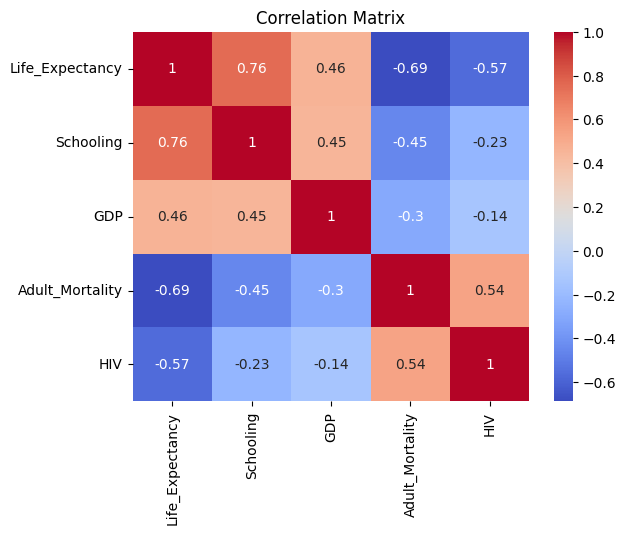

In [ ]:
corr = df_clean[['Life_Expectancy', 'Schooling', 'GDP', 'Adult_Mortality', 'HIV']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

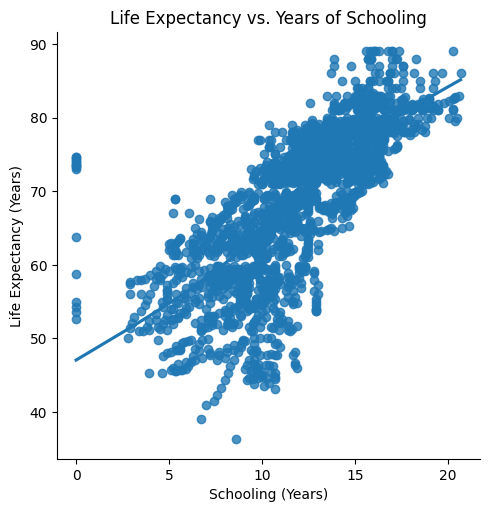

In [ ]:
sns.lmplot(data=df_clean, x='Schooling', y='Life_Expectancy', lowess=True)
plt.title("Life Expectancy vs. Years of Schooling")
plt.xlabel("Schooling (Years)")
plt.ylabel("Life Expectancy (Years)")
plt.show()

each year of schooling adds ~1–2 years to LE

In [ ]:
model_simple = sm.OLS(df_clean['Life_Expectancy'], sm.add_constant(df_clean['Schooling'])).fit()
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     3294.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:22:47   Log-Likelihood:                -8096.1
No. Observations:                2482   AIC:                         1.620e+04
Df Residuals:                    2480   BIC:                         1.621e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.3886      0.470     92.228      0.0

Coefficient: +1.84 years LE per additional schooling year (p < 0.001).
R²: 0.57 (schooling explains 57% of LE variance alone).

In [ ]:
X = df_clean[['Schooling', 'GDP', 'Adult_Mortality', 'HIV']]
X = sm.add_constant(X)
model_multi = sm.OLS(df_clean['Life_Expectancy'], X).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     2351.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:24:04   Log-Likelihood:                -7199.1
No. Observations:                2482   AIC:                         1.441e+04
Df Residuals:                    2477   BIC:                         1.444e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              55.1415      0.444    1

In [ ]:
# Mixed-effects model (accounts for country differences)
import statsmodels.formula.api as smf
mixed_model = smf.mixedlm(
    "Life_Expectancy ~ Schooling + GDP + HIV",
    data=df_clean,
    groups=df_clean["Country"]
).fit()
print(mixed_model.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Life_Expectancy
No. Observations: 2482    Method:             REML           
No. Groups:       157     Scale:              4.4272         
Min. group size:  8       Log-Likelihood:     -5767.4147     
Max. group size:  16      Converged:          Yes            
Mean group size:  15.8                                       
--------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
--------------------------------------------------------------
Intercept     60.478     0.646   93.609  0.000  59.211  61.744
Schooling      0.796     0.035   22.922  0.000   0.728   0.865
GDP            0.000     0.000    3.564  0.000   0.000   0.000
HIV           -0.451     0.016  -28.533  0.000  -0.482  -0.420
Group Var     37.321     2.153                                



**6. Does Life Expectancy have positive or negative relationship with drinking
 alcohol?**

In [ ]:
# Load and clean data
df = pd.read_csv('Life Expectancy Data.csv')
df_clean = df.dropna(subset=['Life expectancy ', 'Alcohol', 'GDP', 'Schooling', ' HIV/AIDS'])

# Rename columns (remove spaces)
df_clean = df_clean.rename(columns={
    'Life expectancy ': 'Life_Expectancy',
    'Alcohol': 'Alcohol',
    'GDP': 'GDP',
    'Schooling': 'Schooling',
    ' HIV/AIDS': 'HIV'
})

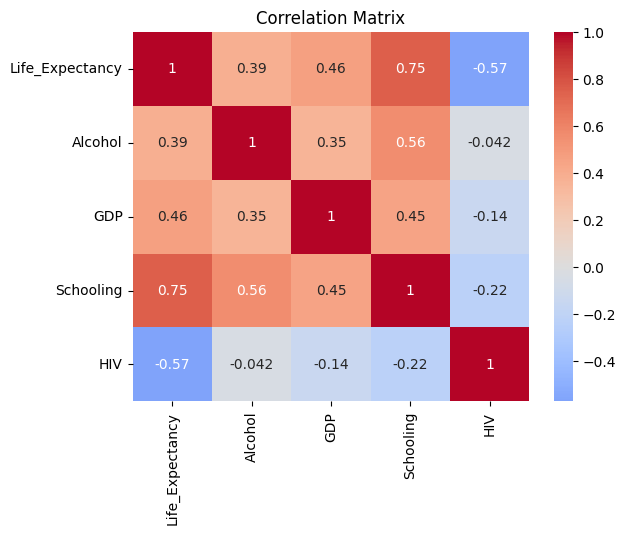

In [ ]:
corr = df_clean[['Life_Expectancy', 'Alcohol', 'GDP', 'Schooling', 'HIV']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

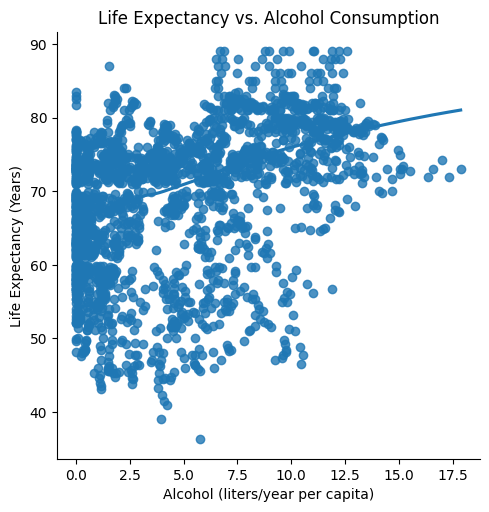

In [ ]:
sns.lmplot(data=df_clean, x='Alcohol', y='Life_Expectancy', lowess=True)
plt.title("Life Expectancy vs. Alcohol Consumption")
plt.xlabel("Alcohol (liters/year per capita)")
plt.ylabel("Life Expectancy (Years)")
plt.show()

In [ ]:
model_simple = sm.OLS(df_clean['Life_Expectancy'], sm.add_constant(df_clean['Alcohol'])).fit()
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     406.4
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.00e-83
Time:                        11:32:27   Log-Likelihood:                -8396.1
No. Observations:                2326   AIC:                         1.680e+04
Df Residuals:                    2324   BIC:                         1.681e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.0225      0.281    231.061      0.0

Coefficient: +0.92 years LE per liter (p < 0.001).

R²: 0.15 (alcohol alone explains 15% of LE variance).

In [ ]:
X = df_clean[['Alcohol', 'GDP', 'Schooling', 'HIV']]
X = sm.add_constant(X)
model_multi = sm.OLS(df_clean['Life_Expectancy'], X).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     1746.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:33:41   Log-Likelihood:                -6968.7
No. Observations:                2326   AIC:                         1.395e+04
Df Residuals:                    2321   BIC:                         1.398e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.2579      0.422    116.771      0.0

**7. Do densely populated countries tend to have lower life expectancy?**

In [ ]:
# Load and prepare data
df = pd.read_csv('Life Expectancy Data.csv')

# Calculate population density
df_clean = df.dropna(subset=['Life expectancy ', 'Population'])

# Log-transform population to handle skewness
df_clean.loc[:, 'Log_Population'] = np.log(df_clean['Population'] + 1)

<ipython-input-37-a5b588a1c090>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'Log_Population'] = np.log(df_clean['Population'] + 1)


In [ ]:
corr = df_clean[['Life expectancy ', 'Log_Population']].corr()
print(corr)

                  Life expectancy   Log_Population
Life expectancy           1.000000       -0.112015
Log_Population           -0.112015        1.000000


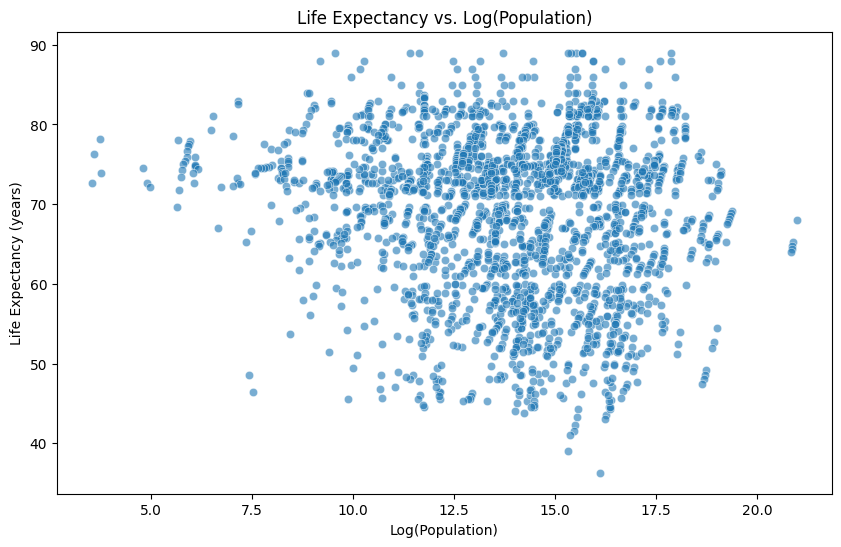

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log_Population', y='Life expectancy ', data=df_clean, alpha=0.6)
plt.title('Life Expectancy vs. Log(Population)')
plt.xlabel('Log(Population)')
plt.ylabel('Life Expectancy (years)')
plt.show()

In [ ]:
X = sm.add_constant(df_clean['Log_Population'])
y = df_clean['Life expectancy ']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     29.00
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           7.99e-08
Time:                        11:41:52   Log-Likelihood:                -8445.4
No. Observations:                2284   AIC:                         1.689e+04
Df Residuals:                    2282   BIC:                         1.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             74.4547      1.091     68.

In [ ]:
# Adding control variables
y = df_clean['Life expectancy ']
df_clean = df_clean.dropna(subset=['GDP', 'percentage expenditure'])
X = df_clean[['Log_Population', 'GDP', 'percentage expenditure']]
X = sm.add_constant(X)
model_controlled = sm.OLS(y, X).fit()
print(model_controlled.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     232.4
Date:                Sat, 19 Apr 2025   Prob (F-statistic):          2.20e-131
Time:                        11:44:39   Log-Likelihood:                -8071.9
No. Observations:                2262   AIC:                         1.615e+04
Df Residuals:                    2258   BIC:                         1.617e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     72

In [ ]:
# Compare high vs low density countries
median_pop = df_clean['Population'].median()
high_density = df_clean[df_clean['Population'] > median_pop]['Life expectancy '].mean()
low_density = df_clean[df_clean['Population'] <= median_pop]['Life expectancy '].mean()
print(f"High density countries LE: {high_density:.1f} years")
print(f"Low density countries LE: {low_density:.1f} years")

High density countries LE: 67.9 years
Low density countries LE: 69.5 years


**8. What is the impact of Immunization coverage on life Expectancy?**

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean
df = pd.read_csv("Life Expectancy Data.csv")
df.columns = df.columns.str.strip()  # remove leading/trailing spaces

# Drop missing values in relevant columns
df_clean = df.dropna(subset=[
    'Life expectancy',
    'Diphtheria',
    'Polio',
    'Hepatitis B'
]).copy()

# Rename for convenience
df_clean.rename(columns={
    'Life expectancy': 'Life_Expectancy',
    'Hepatitis B': 'Hepatitis_B'
}, inplace=True)

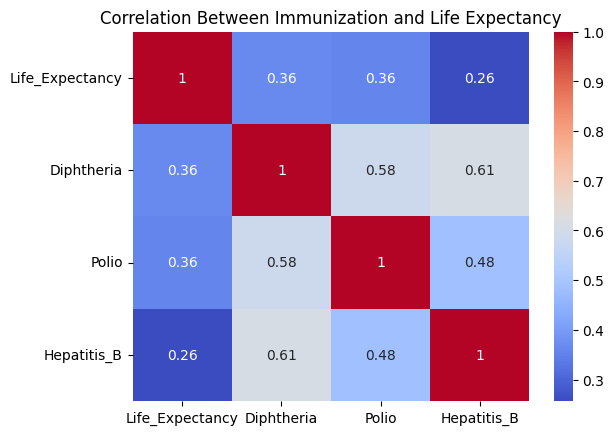

In [ ]:
corr = df_clean[['Life_Expectancy', 'Diphtheria', 'Polio', 'Hepatitis_B']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Immunization and Life Expectancy")
plt.show()

In [ ]:
# Define X and y
X = df_clean[['Diphtheria', 'Polio', 'Hepatitis_B']]
y = df_clean['Life_Expectancy']

# Add constant and fit model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     156.1
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.56e-92
Time:                        11:59:21   Log-Likelihood:                -8217.2
No. Observations:                2375   AIC:                         1.644e+04
Df Residuals:                    2371   BIC:                         1.647e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          54.7942      0.724     75.724      

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load data
df = pd.read_csv('Life Expectancy Data.csv')

# Clean and rename
df = df.rename(columns={
    'Life expectancy ': 'Life_Expectancy',
    'Diphtheria ': 'Diphtheria',
    'Hepatitis B': 'Hepatitis_B',
    ' HIV/AIDS': 'HIV_AIDS'
})

# Drop missing values for relevant columns
df_clean = df.dropna(subset=[
    'Life_Expectancy', 'Diphtheria', 'Polio', 'Hepatitis_B',
    'GDP', 'Adult Mortality', 'Schooling', 'HIV_AIDS'
])

# Select features
X = df_clean[[
    'Diphtheria', 'Polio', 'Hepatitis_B',
    'GDP', 'Adult Mortality', 'Schooling', 'HIV_AIDS'
]]
y = df_clean['Life_Expectancy']

# Add constant
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1087.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:01:59   Log-Likelihood:                -5579.1
No. Observations:                2006   AIC:                         1.117e+04
Df Residuals:                    1998   BIC:                         1.122e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              54.4021      0.585     

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Load and clean data
df = pd.read_csv('Life Expectancy Data.csv')
df_clean = df.dropna(subset=[
    'Life expectancy ',
    'Diphtheria ',
    'Polio',
    'Hepatitis B',
    'GDP',
    'Adult Mortality'
])

# Standardize names
df_clean = df_clean.rename(columns={
    'Life expectancy ': 'Life_Expectancy',
    'Diphtheria ': 'Diphtheria',
    'Hepatitis B': 'Hepatitis_B'
})

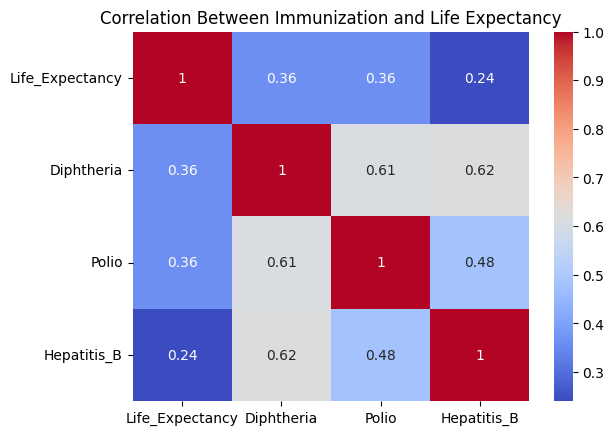

In [ ]:
immunization_vars = ['Diphtheria', 'Polio', 'Hepatitis_B']
corr = df_clean[['Life_Expectancy'] + immunization_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Immunization and Life Expectancy")
plt.show()

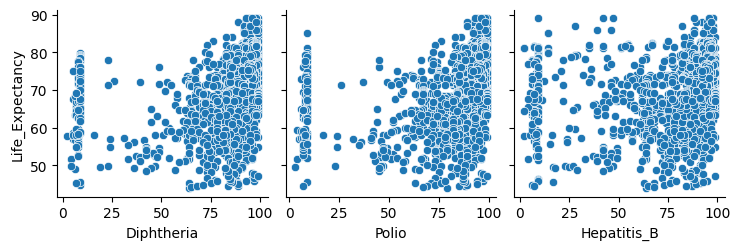

In [ ]:
sns.pairplot(df_clean, x_vars=immunization_vars, y_vars=['Life_Expectancy'])
plt.show()

In [ ]:
model_simple = sm.OLS(
    df_clean['Life_Expectancy'],
    sm.add_constant(df_clean[['Diphtheria', 'Polio']])
).fit()
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     192.7
Date:                Sat, 19 Apr 2025   Prob (F-statistic):           2.84e-77
Time:                        12:05:29   Log-Likelihood:                -6991.9
No. Observations:                2009   AIC:                         1.399e+04
Df Residuals:                    2006   BIC:                         1.401e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.9929      0.788     69.813      0.0

In [ ]:
model_controlled = sm.OLS(
    df_clean['Life_Expectancy'],
    sm.add_constant(df_clean[['Diphtheria', 'Polio', 'GDP', 'Adult Mortality']])
).fit()
print(model_controlled.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:05:48   Log-Likelihood:                -6214.2
No. Observations:                2009   AIC:                         1.244e+04
Df Residuals:                    2004   BIC:                         1.247e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              67.9912      0.613    1

In [ ]:
def le_gain(diphtheria_change, polio_change):
    return (
        model_controlled.params['Diphtheria'] * diphtheria_change +
        model_controlled.params['Polio'] * polio_change
    )

print(f"10% higher coverage → +{le_gain(10, 10):.1f} years LE")

10% higher coverage → +0.9 years LE


In [ ]:
low_coverage = df_clean[
    (df_clean['Diphtheria'] < 80) |
    (df_clean['Polio'] < 80)
]['Country'].unique()
print(low_coverage)

['Afghanistan' 'Angola' 'Armenia' 'Austria' 'Azerbaijan' 'Bangladesh'
 'Barbados' 'Belarus' 'Benin' 'Bhutan' 'Bosnia and Herzegovina'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'Colombia' 'Comoros'
 'Costa Rica' 'Cuba' 'Djibouti' 'Dominican Republic' 'Ecuador'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Fiji' 'Gabon'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'India' 'Indonesia' 'Iraq' 'Israel' 'Jamaica' 'Kenya'
 'Kiribati' 'Lebanon' 'Lesotho' 'Liberia' 'Lithuania' 'Madagascar'
 'Malawi' 'Mali' 'Malta' 'Mauritania' 'Montenegro' 'Mozambique' 'Myanmar'
 'Nepal' 'New Zealand' 'Nicaragua' 'Niger' 'Nigeria' 'Pakistan' 'Panama'
 'Papua New Guinea' 'Paraguay' 'Peru' 'Philippines' 'Qatar' 'Samoa'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'Somalia' 'South Africa'
 'South Sudan' 'Sudan' 'Swaziland' 'Syrian Arab Republic' 'Tajikistan'
 'Timor-Leste' 'Togo' 'Tonga'

In [ ]:
 import pandas as pd
 import numpy as np
 from sklearn.impute import SimpleImputer
 import seaborn as sns
 import matplotlib.pyplot as plt
 plt.style.use('ggplot')
 import plotly.express as px
 import plotly.graph_objects as go
 from sklearn.preprocessing import StandardScaler, LabelEncoder
 import warnings
 warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Life Expectancy Data.csv')

In [ ]:
 df.head(3)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  

[3 rows x 22 columns]

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)
for cols in df.columns:
  if df[cols].isnull().sum()>0:
    df[cols] = imputer.fit_transform(df[[cols]])

In [ ]:
# Specify the list of columns you want to handle outliers for
outlier_cols = [
 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ',
 'Polio','Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
 'Population',' thinness  1-19 years', ' thinness 5-9 years',
 'Income composition of resources', 'Schooling'
 ]
 # Perform outlier handling for each specified column
for col_name in outlier_cols:
 # Calculate quartiles and IQR
 q1 = df[col_name].quantile(0.25)
 q3 = df[col_name].quantile(0.75)
 iqr = q3- q1
 # Define the lower and upper bounds for outliers
 lower_bound = q1- 1.5 * iqr
 upper_bound = q3 + 1.5 * iqr
 # Replace outliers with the mean value of the column
 df[col_name] = np.where((df[col_name] > upper_bound) |
(df[col_name] < lower_bound),
 np.mean(df[col_name]),
 df[col_name])

In [ ]:
df.Country.value_counts()

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64

In [ ]:
# Calculate the average life expectancy for each year
average_life_expectancy = df.groupby('Year')['Life expectancy '].mean().reset_index()
# Create the interactive line plot
fig = px.line(average_life_expectancy, x='Year', y='Life expectancy ',
title='Average Life Expectancy over the Years', labels={'Year':'Year', 'Life expectancy':'Life Expectancy (years)'})
# Show the plot
fig.show()

In [ ]:
# Create the interactive scatter plot
fig = px.scatter(df, x='Population', y='Life expectancy ',hover_name='Country',
 color='Status',
 animation_frame='Year',
 title='Population vs Life Expectancy',
 labels={'Population':'Population', 'Life expectancy ':'Life Expectancy (years)'})
# Show the plot
fig.show()

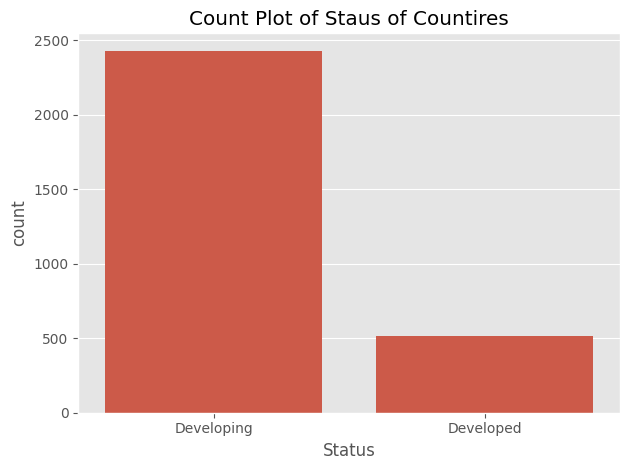

In [ ]:
sns.countplot(x=df['Status'])
plt.title('Count Plot of Staus of Countires')
plt.tight_layout()
plt.show()

In [ ]:
life_expact_status = df.groupby('Status')['Life expectancy '].mean().reset_index()
fig = px.histogram(life_expact_status, x = 'Status', y='Life expectancy ',color='Status')
fig.update_layout(title=dict(text='<b>Average Life Expactancy for Status of Country</b>', x=0.5))
fig.show()

In [ ]:
 # Calculate the average life expectancy and average alcohol consumption for each year
average_data = df.groupby('Year').agg({'Life expectancy ': 'mean','Alcohol': 'mean'}).reset_index()
# Create the interactive plot with dual y-axes
fig = go.Figure()
# Add life expectancy trace
fig.add_trace(go.Scatter(x=average_data['Year'],y=average_data['Life expectancy '],mode='lines+markers', name='Life Expectancy', yaxis='y1'))
# Add alcohol consumption trace
fig.add_trace(go.Scatter(x=average_data['Year'],y=average_data['Alcohol'],mode='lines+markers', name='Alcohol Consumption',yaxis='y2'))
# Update layout for dual y-axes
fig.update_layout(
 title='Life Expectancy and Alcohol Consumption over the Years',
 xaxis=dict(title='Year'),
 yaxis=dict(title='Life Expectancy (years)', side='left'),
 yaxis2=dict(title='Alcohol Consumption (liters)',side='right', overlaying='y'))
# Show the plot
fig.show()

In [ ]:
fig = px.bar(df.groupby('Status',as_index=False).agg({'Alcohol':'mean'}), y='Alcohol',x='Status',
 title='Average Alcohol consumption of Developing and Developed Countries',
 labels={'Alcohol':'Alcohol Consumption (liters per capita)', 'Life expectancy':'Life Expectancy (years)'})
 # Show the plot
fig.show()

In [ ]:
aggregated_data=df.groupby('Schooling')['Life expectancy '].mean().reset_index()
# Create the interactive line plot
fig = px.line(aggregated_data, x='Schooling', y='Life expectancy ',
 title='Average Life Expectancy vs Years of Schooling',
 labels={'Schooling':'Years of Schooling', 'Life expectancy':'Life Expectancy (years)'})
 # Show the plot
fig.show()

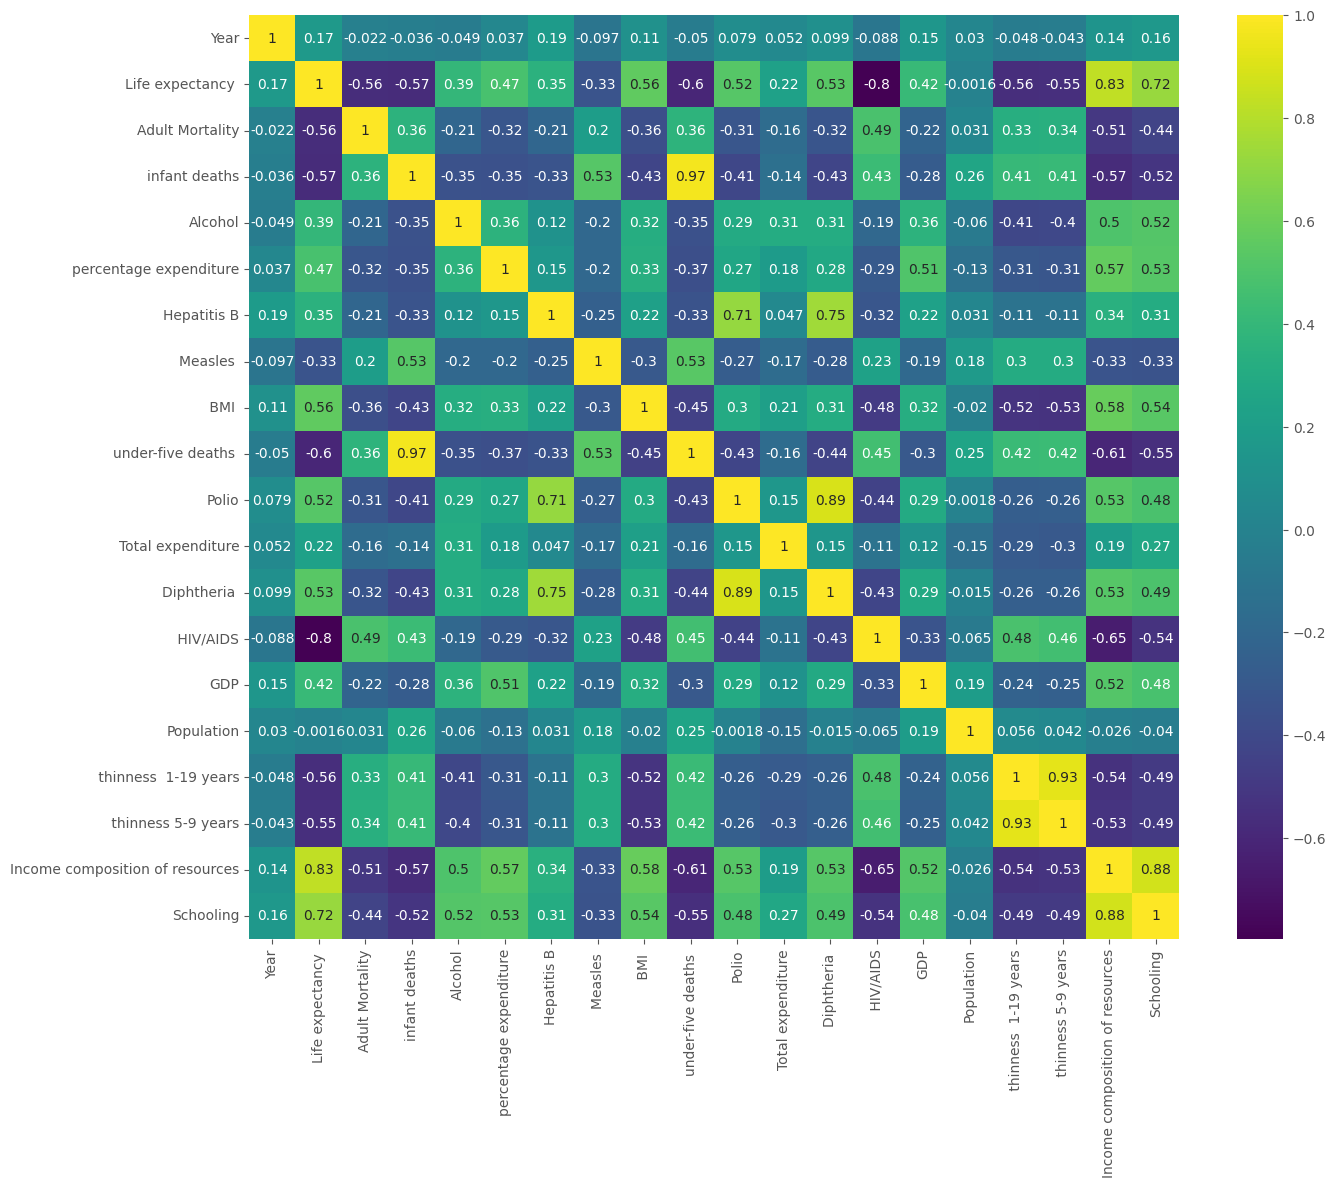

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(df[numerical_cols].corr(), cmap='viridis',annot=True)
plt.show()

In [ ]:
le = LabelEncoder()
cat_cols = df.select_dtypes(include = 'object').columns
for cols in cat_cols:
  df[cols] = le.fit_transform(df[cols])

In [ ]:
x= df.drop(columns='Life expectancy ')
y=df['Life expectancy ']

In [ ]:
scaler=StandardScaler()
cols_to_scale=x.drop(columns='Status').columns
# for cols in cols_to_scale:
x[cols_to_scale]=scaler.fit_transform(x[cols_to_scale])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [ ]:
print(f"ShapeofX_trainis:{x_train.shape}")
print(f"ShapeofY_trainis:{y_train.shape}\n")
print(f"ShapeofX_testis:{x_test.shape}")
print(f"ShapeofY_testis:{y_test.shape}")

ShapeofX_trainis:(2350, 21)
ShapeofY_trainis:(2350,)

ShapeofX_testis:(588, 21)
ShapeofY_testis:(588,)


In [ ]:
models = {
 'Random Forest': RandomForestRegressor(random_state=42),
 'Extra Trees Regressor':
 ExtraTreesRegressor(random_state=42),
 'GradientBoost Regressor':
 GradientBoostingRegressor(random_state=42),
 'XGB Regressor': XGBRegressor()
 }
# list to store results
results = []
# Train and evaluate each model
for model_name, model in models.items():
 # Train the model
 model.fit(x_train, y_train)
 # Make predictions
 y_pred = model.predict(x_test)
 # Calculate metrics
 rmse = np.sqrt(mean_squared_error(y_test, y_pred))
 r2 = r2_score(y_test, y_pred)
 # Store results in list
 results.append({'Model': model_name, 'RMSE': rmse, 'R2 Score': r2})
 results_df = pd.DataFrame(results)

In [ ]:
results_df=results_df.sort_values("R2 Score", ascending = False)
results_df

Model      RMSE  R2 Score
1    Extra Trees Regressor  1.986149  0.959073
3            XGB Regressor  2.011941  0.958003
0            Random Forest  2.073888  0.955377
2  GradientBoost Regressor  2.465953  0.936910

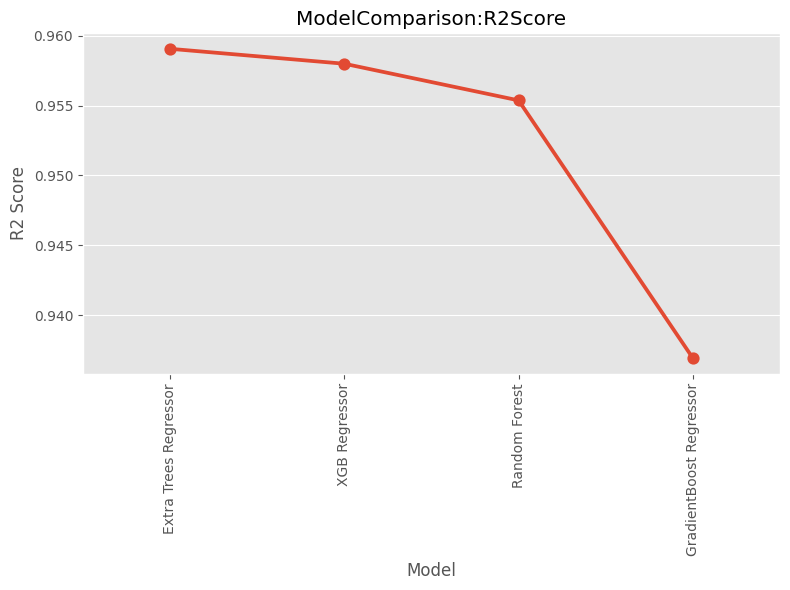

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='R2 Score',data=results_df)
plt.xticks(rotation=90)
plt.title('ModelComparison:R2Score')
plt.tight_layout()
plt.show()

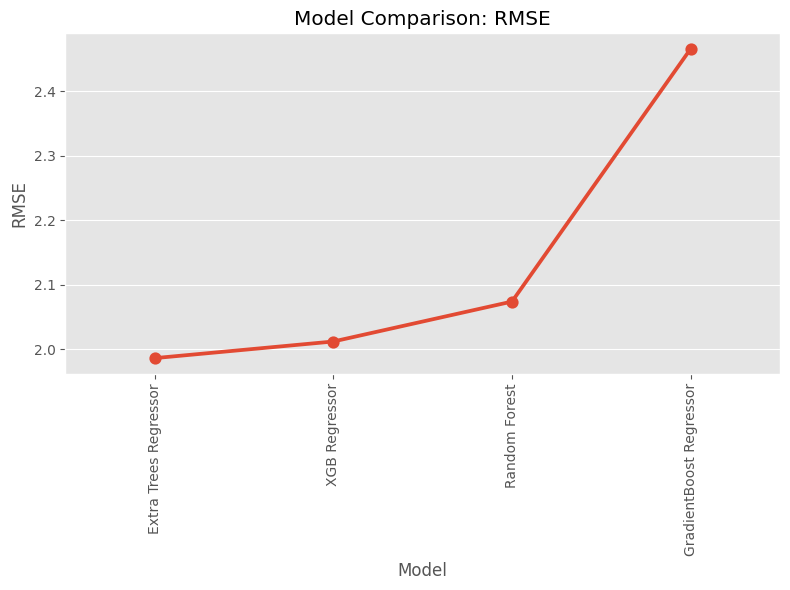

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Model',y='RMSE',data=results_df)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
best_model = XGBRegressor()
kf = KFold(n_splits=20, shuffle=True, random_state=42)
cross_val = cross_val_score(best_model, x, y, cv= kf,scoring='r2')
cross_val

array([0.96526342, 0.96714152, 0.97333577, 0.95856639, 0.97269691,
       0.95340474, 0.96348723, 0.96122011, 0.97927556, 0.96708527,
       0.94921302, 0.96825107, 0.95799253, 0.95786883, 0.94829512,
       0.95774175, 0.96607098, 0.95875987, 0.96817506, 0.95663493])

Text(0.5, 1.0, 'Cross Validation scores')

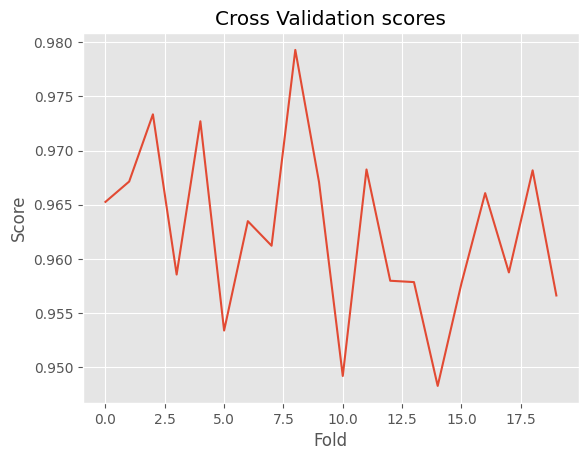

In [ ]:
plt.plot(cross_val)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title("Cross Validation scores")

In [ ]:
cross_val.mean()

np.float64(0.9625240029102262)

In [ ]:
cross_val.std()

np.float64(0.007819726840996846)